In [22]:
import scipy as sp
import scipy.integrate as spint8
import GWGen; from GWGen import WFGenerator
from GWGen.WFGenerator import *
from few.utils.utility import get_separatrix
import time
import matplotlib.pyplot as plt

# set initial parameters
M = 1e6
m = 1e1
mu = 3.4e-17
a = 0.9
p0 = 10.0
e0 = 0.1
iota0 = 0.0
Y0 = np.cos(iota0)
Phi_phi0 = 0.
Phi_theta0 =0.
Phi_r0 = 0.


qS = 0.2
phiS = 0.8
qK = 0.2
phiK = 0.8
dist = 1.0
mich = False
dt = 15.0
T = 5.0

alphaval = alphavalue(M,mu)
print(r"alpha = {0}".format(alphaval))


use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "npoints": 500,  # we want a densely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

alpha = 0.25442669409345564


In [10]:
diffeq=PN(M,m)
yrtosec = 60*60*24*365
t_start = 0
t_stop = 5*yrtosec
t_span = (t_start, t_stop)
t_dom = np.arange(t_start,t_stop, 1/365 * yrtosec)
y0 = [10,0.5,0,0]
meth = "DOP853" #runge kutta order 8
dense_output = True
run = True
SEPARATRIXCUTOFF=0.2
Init_Separatrix=get_separatrix(float(a), y0[1], 1.)
diffeq.separatrix_cutoff=Init_Separatrix
def event_tracker(t,y_vec):
    p,e = y_vec[0:2] 
    if e>=1.0 or e<0:
        exit_reason="Eccentricity exceeded bounds"
        return 0
    if p<SEPARATRIXCUTOFF+Init_Separatrix:
        exit_reason="Separatrix reached!"
        return 0
    return 1
event_tracker.terminal=True

res=spint8.solve_ivp(diffeq,t_span, y0, method=meth, t_eval=t_dom, dense_output=dense_output,events=event_tracker)

In [11]:
tpoints = res["t"]
ppoints = res["y"][0]

In [28]:
new_t_dom = np.arange(t_start, res["t"][-1], 100)

In [29]:
points = res['sol'](new_t_dom)

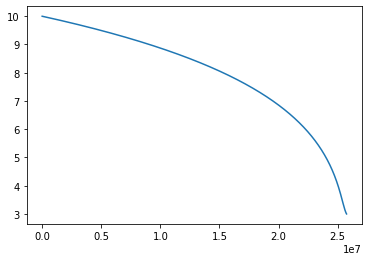

In [30]:
plt.plot(new_t_dom, points[0])

In [46]:
res["t"][-1]/yrtosec * 365

298.0